Install dependencies

In [ ]:
pip install easyocr openai matplotlib python-dotenv


🧰 Import depedencies



In [ ]:
import os
import cv2
import openai
import easyocr
import matplotlib.pyplot as plt
from torch.cuda import is_available
from dotenv import load_dotenv

📜 Text extraction from image



In [ ]:
class Reader:
    def __init__(self, is_cuda=False):
        self.reader = easyocr.Reader(['en'], gpu=is_cuda, model_storage_directory=os.path.join('models'), download_enabled=True)

    def __call__(self, img):
        return self.extract_text(img)

    def extract_text(self, img, show_text=False, show_confidence=False):
        result = self.reader.readtext(img)

        extracted_text = []

        for text in filter(lambda x: x[-1] > .45, result):
            box, acc_text, confidence = text

            # box[0] and box[2] - upper left and lower right corners of the box
            img = cv2.rectangle(img, [int(i) for i in box[0]], [int(i) for i in box[2]], (0, 255, 0), 2) # each coordinate is a list has to be int

            if show_text and show_confidence:
                img_text = f'{acc_text} - ({"{:.3f}".format(confidence)}%)'

            elif show_text:
                img_text = acc_text

            elif show_confidence:
                img_text = f'CONF: ({"{:.3f}".format(confidence)}%)'

            if show_text or show_confidence:
                img = cv2.putText(
                    img,
                    img_text,
                    (int(box[0][0]), int(box[0][1] - 3)),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    fontScale=.5,
                    color=(168, 90, 50),
                    thickness=2
                )

            extracted_text.append(acc_text)

        return extracted_text, img



In [ ]:
def read_img(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    return img

Extracted_text
Walmart Save money: Live better: 526 237 0154 MANACER TONY ESCARIO PORTLAND;   OREGON; TR#  09750 HP JET FRINTER 25002840008408 273,27 X SUBTOTAL 12,84 TAX 26,62 TOTAL 299,89 DEBIT TEND 299,89 EFT deBIT PAY FROM PRIMARY ACCOLNT # APPROVAL 001824 REF # 224500487251 TERMINAL 52084660 28/09/19 14:16:00 CHANGE DLE 0,00 ITEMS SOLD 3 2857 6283 1227 Like Malaart on Facebook 26/09/19 14: 16:00


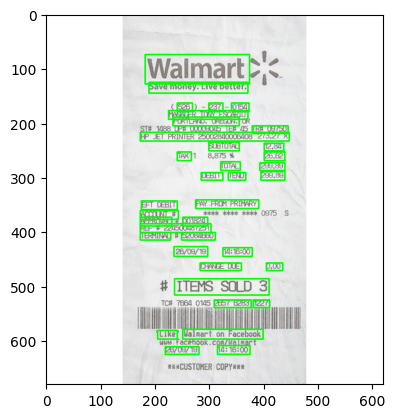

In [ ]:
if __name__ == '__main__':

    reader = Reader(is_cuda=is_available())

    img = read_img('/content/fatoorah3.png')
    text, extracted_image = reader(img)

    text = ' '.join(text)

    print('Extracted_text')
    print(text)

    plt.imshow(extracted_image)
    plt.show()